## Loading required data sets and libraries

In [14]:
require(ggplot2)
library(ggpubr)

df <- read.table('output/graph/node.csv', sep=',', header=T)
df <- df[order(-df$pvalue_mean),]

gene.names <- read.table('output/ensg_x_gene_name.csv', sep=',', header=T)

df.gene <- df[df$type == 'Gene',]
df.gene <- merge(df.gene, gene.names, by.x='node', by.y='genemania')
df.gene$type <- NULL

df.clin <- df[df$type == 'Clinical',]
df.clin$type <- NULL

head(df)

,node,weight,entropy_mean,pvalue_mean,type
41,transplant,10,0.9988153,1.0000000,Clinical
35,SUMO1P3,2,4.1412505,0.9993888,Gene
16,FAM229B,12,7.8967876,0.9977810,Gene
10,CFAP36,12,8.8341342,0.9977385,Gene
12,CTC-297N7.9,2,4.3139686,0.9977305,Gene
22,IQCK,4,7.0244949,0.9977278,Gene


In [2]:
clinical <- read.table('../../data/MMRF/clinical.tsv', sep='\t', header=T, stringsAsFactors=F)

days.to.disease.progression <- read.table(
    '../../data/MMRF/rawdata/clinical_outcome/time_to_endpoint/days_to_disease_progression.tsv', sep='\t', header=T)

treatment <- read.table('../../data/MMRF/rawdata/therapy/therapy_first_line.tsv', sep='\t', header=T)
treatment$treatment <- treatment$therapy_first_line
treatment$therapy_first_line <- NULL

treatment <- treatment[treatment$treatment %in% c('Bor-Cyc-Dex', 'Bor-Dex', 'Bor-Len-Dex', 'Len-Dex'),]

clinical <- merge(clinical, days.to.disease.progression, by='ID')
clinical <- merge(clinical, treatment, by='ID')

clinical$transplant <- clinical$first_line_transplant
clinical$first_line_transplant <- NULL

clinical$beta_2 <- clinical$beta_2_microglobulin
clinical$beta_2_microglobulin <- NULL

clinical$aneuploid <- clinical$percent_aneuploid
clinical$percent_aneuploid <- NULL

clinical$peripherical_blood <- clinical$percent_plama_cells_peripherical_blood
clinical$percent_plama_cells_peripherical_blood <- NULL

outcome_columns <- c('ID', 'response_best_response_first_line', 'days_to_disease_progression', 'treatment')
outcomes_and_treatment <- clinical[, outcome_columns]
outcomes_and_treatment <- outcomes_and_treatment[!is.na(outcomes_and_treatment$response_best_response_first_line),]

clinical <- clinical[,as.character(c(outcome_columns, as.character(df.clin$node)))]

clinical[clinical == 'Yes'] = 1
clinical[clinical == 'No'] = 0

clinical <- clinical[!is.na(clinical$response_best_response_first_line),]
clinical$response_best_response_first_line[clinical$response_best_response_first_line == 1] <- 'Sensitive'
clinical$response_best_response_first_line[clinical$response_best_response_first_line == 0] <- 'Non-sensitive'

print(nrow(clinical))

head(clinical)

[1] 420


ID,response_best_response_first_line,days_to_disease_progression,treatment,transplant,beta_2,hemoglobin,ldh,age,bun,aneuploid,lgg,creatinine,wbc_x10_10_9_l,peripherical_blood
MMRF1011,Non-sensitive,1612,Bor-Dex,1,7.84,6.014,NA,50,7.854,0.0,NA,123.760,8.90,0.0
MMRF1013,Sensitive,1332,Bor-Len-Dex,1,NA,7.006,2.15043,66,11.424,0.0,5.27,186.524,7.10,0.2
MMRF1016,Non-sensitive,691,Bor-Cyc-Dex,0,2.92,8.184,3.81743,56,7.854,0.0,29.53,86.632,8.40,0.0
MMRF1017,Non-sensitive,273,Len-Dex,0,3.15,8.618,NA,75,6.069,6.9,NA,79.560,5.59,0.0
MMRF1020,Sensitive,505,Bor-Len-Dex,1,2.10,8.742,3.21731,60,8.925,0.0,9.23,88.400,6.20,0.0
MMRF1021,Non-sensitive,531,Bor-Len-Dex,1,2.10,8.928,9.86864,54,8.925,0.0,70.50,88.400,5.20,0.0


In [3]:
genes <- read.table('../../data/MMRF/gene_count.tsv', sep='\t', header=T)
genes <- genes[,c('ID', as.character(df.gene$marker))]
genes <- merge(genes, outcomes_and_treatment, by='ID')
head(genes)

ID,ENSG00000248790,ENSG00000172955,ENSG00000231533,ENSG00000132965,ENSG00000255139,ENSG00000246090,ENSG00000100336,ENSG00000143515,ENSG00000123810,...,ENSG00000095587,ENSG00000155755,ENSG00000175348,ENSG00000134900,ENSG00000127824,ENSG00000189167,ENSG00000066185,response_best_response_first_line,days_to_disease_progression,treatment
MMRF1021,0,22,6,658,24,62,0,33972,210,...,36,513,1881,1797,4252,4,206,0,531,Bor-Len-Dex
MMRF1030,0,0,0,758,36,31,14,10829,141,...,403,168,2543,1829,4800,11,14,1,1983,Bor-Len-Dex
MMRF1031,1,5,3,773,13,18,1,16396,138,...,40,263,1233,2750,3447,8,26,0,1328,Bor-Len-Dex
MMRF1032,0,0,12,888,24,10,31,6284,134,...,145,117,1059,1509,2660,4,11,0,907,Bor-Cyc-Dex
MMRF1033,2,22,0,99,28,119,0,12738,118,...,50,118,1017,2590,4064,8,29,0,217,Len-Dex
MMRF1038,1,3,1,67,14,8,6,12124,85,...,75,172,987,2612,4850,2,17,0,1752,Len-Dex


Warning message:
"Removed 82 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 82 rows containing non-finite values (stat_compare_means)."Warning message:
"Removed 98 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 98 rows containing non-finite values (stat_compare_means)."Warning message:
"Removed 26 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 26 rows containing non-finite values (stat_compare_means)."Warning message:
"Removed 24 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 24 rows containing non-finite values (stat_compare_means)."Warning message:
"Removed 30 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 30 rows containing non-finite values (stat_compare_means)."Warning message:
"Removed 7 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 7 rows containing non-finite values (stat_compare_means)."Warning message:
"

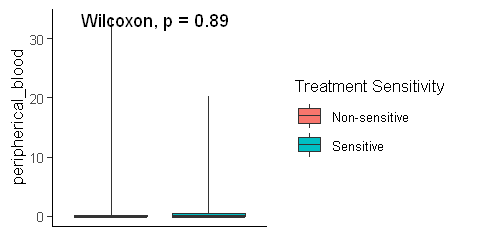

In [4]:
library(scales)

clinical$response_best_response_first_line <- as.factor(clinical$response_best_response_first_line)

options(repr.plot.width=4, repr.plot.height=2)

for (var in names(clinical)[6:15]) {
    
    if (var == 'beta_2')
        var.label <- 'beta 2 microglobulin'
    else
        var.label <- var

    p <- ggplot(clinical) + 
         geom_boxplot(aes_string('response_best_response_first_line', var, 
                      fill='response_best_response_first_line'), coef = 5000) +
         theme_bw() +
         scale_fill_hue(name='Treatment Sensitivity') +
         stat_compare_means(aes_string('response_best_response_first_line', var, 
                      group='response_best_response_first_line')) +
         theme(axis.text.x = element_blank(), 
               axis.ticks.x = element_blank(), 
               panel.grid.major = element_blank(), 
               panel.grid.minor = element_blank(),
               panel.border = element_blank(), 
               axis.line = element_line(colour = "black"),
               text = element_text(size=10)
              ) +
         xlab(NULL) +
         ylab(var.label)

    ggsave(filename=paste('images/feature_analysis/clinical_all/', var, '.pdf', sep=''), plot=p, units='cm', width=10, height=6)
}

p

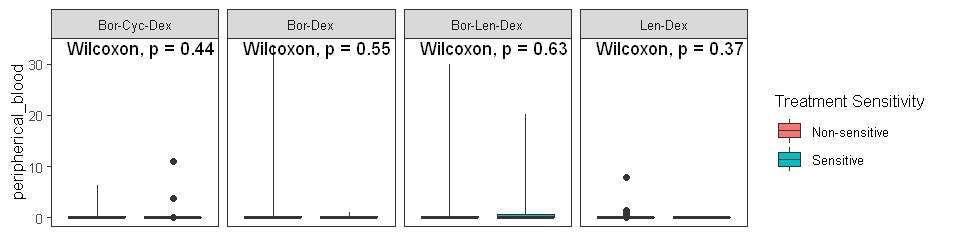

In [5]:
clinical$response_best_response_first_line[clinical$response_best_response_first_line == 1] = 'Sensitive'
clinical$response_best_response_first_line[clinical$response_best_response_first_line == 0] = 'Non-sensitive'

clinical$response_best_response_first_line <- as.factor(clinical$response_best_response_first_line)

options(repr.plot.width=8, repr.plot.height=2)

for (var in names(clinical)[6:15]) {

    if (var == 'beta_2')
        var.label <- 'beta 2 microglobulin'
    else
        var.label <- var
    
    c <- clinical[!is.na(clinical[var]),]
    
    p <- ggplot(c) + 
         geom_boxplot(aes_string('response_best_response_first_line', var, 
                      fill='response_best_response_first_line'), coef = 5000) +
         theme_bw() +
         scale_y_continuous() + 
         scale_fill_hue(name='Treatment Sensitivity') +
         theme(axis.text.x = element_blank(), 
               axis.ticks.x = element_blank(), 
               panel.grid.major = element_blank(), 
               panel.grid.minor = element_blank(),
               text = element_text(size=10)
              ) +
         stat_compare_means(aes_string('response_best_response_first_line', var, 
                      group='response_best_response_first_line')) +
         xlab(NULL) + 
         ylab(var.label) +
         facet_grid(. ~ treatment, scale='free_y')

    ggsave(filename=paste('images/feature_analysis/clinical/', var, '.pdf', sep=''), 
           plot=p, units='cm', width=20, height=6)
}

p

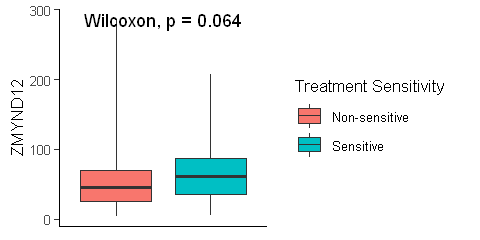

In [6]:
genes$response_best_response_first_line[genes$response_best_response_first_line == 1] = 'Sensitive'
genes$response_best_response_first_line[genes$response_best_response_first_line == 0] = 'Non-sensitive'

genes$response_best_response_first_line <- as.factor(genes$response_best_response_first_line)

options(repr.plot.width=4, repr.plot.height=2)

for (var in names(genes)[2:71]) {

    g <- genes[!is.na(genes[var]),]
    
    gene.name <- df.gene[df.gene$marker == var,]$node
    
    p <- ggplot(g) + 
         geom_boxplot(aes_string('response_best_response_first_line', var, 
                      fill='response_best_response_first_line'), coef = 5000) +
         theme_bw() +
         scale_y_continuous() + 
         scale_fill_hue(name='Treatment Sensitivity') +
         theme(axis.text.x = element_blank(), 
               axis.ticks.x = element_blank(), 
               panel.grid.major = element_blank(), 
               panel.grid.minor = element_blank(),
               panel.border = element_blank(), 
               axis.line = element_line(colour = "black"),
               text = element_text(size=10)
              ) +
         stat_compare_means(aes_string('response_best_response_first_line', var, 
                      group='response_best_response_first_line')) +
         xlab(NULL) + ylab(gene.name)

    ggsave(filename=paste('images/feature_analysis/genes_all/', gene.name, '_', var, '.pdf', sep=''), 
           plot=p, units='cm', width=10, height=6)
}

p

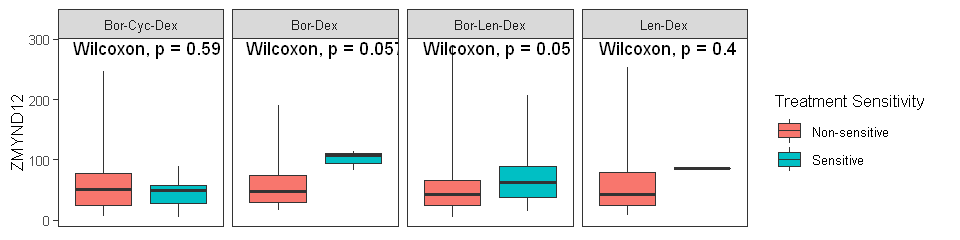

In [7]:
genes$response_best_response_first_line[genes$response_best_response_first_line == 1] = 'Sensitive'
genes$response_best_response_first_line[genes$response_best_response_first_line == 0] = 'Non-sensitive'

genes$response_best_response_first_line <- as.factor(genes$response_best_response_first_line)

options(repr.plot.width=8, repr.plot.height=2)

for (var in names(genes)[2:71]) {

    g <- genes[!is.na(genes[var]),]
    
    gene.name <- df.gene[df.gene$marker == var,]$node
    
    p <- ggplot(g) + 
         geom_boxplot(aes_string('response_best_response_first_line', var, 
                      fill='response_best_response_first_line'), coef = 5000) +
         scale_y_continuous() + 
         scale_fill_hue(name='Treatment Sensitivity') +
         theme_bw() +
         theme(axis.text.x = element_blank(), 
               axis.ticks.x = element_blank(), 
               panel.grid.major = element_blank(), 
               panel.grid.minor = element_blank(),
               text = element_text(size=10)
         ) +
         stat_compare_means(aes_string('response_best_response_first_line', var, 
                      group='response_best_response_first_line')) +
         xlab(NULL) + ylab(gene.name) +
         facet_grid(. ~ treatment, scale='free_y')

    ggsave(filename=paste('images/feature_analysis/genes/', gene.name, '_', var, '.pdf', sep=''), 
           plot=p, units='cm', width=16, height=6)
}

p

In [15]:
agg1 <- aggregate(. ~ response_best_response_first_line, data=clinical, FUN=length)
agg2 <- aggregate(. ~ response_best_response_first_line + transplant, data=clinical, FUN=length)

agg1 <- agg1[c('response_best_response_first_line', 'ID')]
colnames(agg1) <- c('risk', 'overall_count')

agg2 <- agg2[,c('transplant', 'response_best_response_first_line', 'ID')]
colnames(agg2) <- c('transplant', 'risk', 'local_count')

agg <- merge(agg1, agg2, by='risk')

agg$relative <- agg$local_count / agg$overall_count

agg

risk,overall_count,transplant,local_count,relative
Non-sensitive,182,0,101,0.5549451
Non-sensitive,182,1,81,0.4450549
Sensitive,35,0,11,0.3142857
Sensitive,35,1,24,0.6857143


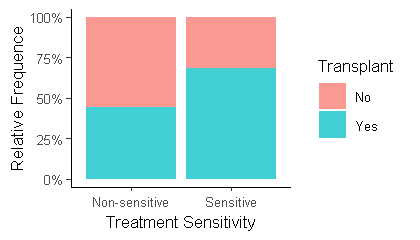

In [16]:
library(ggplot2)

ticks.line.color <- 'grey30'

labels <- data.frame(x=c('Len-Dex', 'Bor-Len-Dex', 'Bor-Dex', 'Bor-Cyc-Dex'), 
                     y=c(1.01, 1.01, 1.01, 1.01), 
                     lab=c('n=50', 'n=236', 'n=64', 'n=133')) 

agg$transplant[agg$transplant == 0] = 'No'
agg$transplant[agg$transplant == 1] = 'Yes'

p <- ggplot() +
     geom_bar(data=agg, alpha=.75, aes(x=risk, y=relative, fill=transplant), stat="identity") +
     xlab('Treatment Sensitivity') + 
     ylab('Relative Frequence') +
     scale_fill_hue(name='Transplant') +
     scale_y_continuous(labels = scales::percent) +
     theme_bw() +
     theme(panel.grid.major = element_blank(), 
           panel.grid.minor = element_blank(),
           panel.border = element_blank(), 
           axis.line = element_line(colour = "black"),
           text = element_text(size=10))

options(repr.plot.width=3.5, repr.plot.height=2)

ggsave(filename='images/feature_analysis/clinical_all/transplant_relative.pdf', plot=p, units='cm', width=8, height=4)

p

In [10]:
agg1 <- aggregate(. ~ response_best_response_first_line + treatment, data=clinical, FUN=length)
agg2 <- aggregate(. ~ response_best_response_first_line + transplant + treatment, data=clinical, FUN=length)

agg1 <- agg1[c('response_best_response_first_line', 'treatment', 'ID')]
colnames(agg1) <- c('risk', 'treatment', 'overall_count')

agg2 <- agg2[,c('transplant', 'response_best_response_first_line','treatment', 'ID')]
colnames(agg2) <- c('transplant', 'risk', 'treatment', 'local_count')

agg <- merge(agg1, agg2, by=c('risk', 'treatment'))

agg$relative <- agg$local_count / agg$overall_count

agg

risk,treatment,overall_count,transplant,local_count,relative
Non-sensitive,Bor-Cyc-Dex,41,0,24,0.5853659
Non-sensitive,Bor-Cyc-Dex,41,1,17,0.4146341
Non-sensitive,Bor-Dex,28,0,24,0.8571429
Non-sensitive,Bor-Dex,28,1,4,0.1428571
Non-sensitive,Bor-Len-Dex,85,0,32,0.3764706
Non-sensitive,Bor-Len-Dex,85,1,53,0.6235294
Non-sensitive,Len-Dex,28,0,21,0.7500000
Non-sensitive,Len-Dex,28,1,7,0.2500000
Sensitive,Bor-Cyc-Dex,6,0,3,0.5000000
Sensitive,Bor-Cyc-Dex,6,1,3,0.5000000


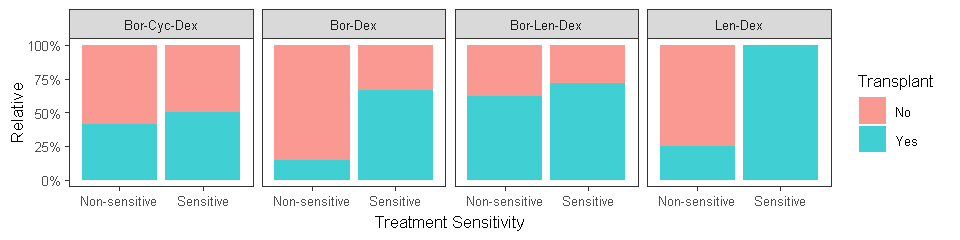

In [11]:
ticks.line.color <- 'grey30'

agg$transplant[agg$transplant == 0] = 'No'
agg$transplant[agg$transplant == 1] = 'Yes'

p <- ggplot() +
     geom_bar(data=agg, alpha=.75, aes(x=risk, y=relative, fill=transplant), stat="identity") +
     xlab('Treatment Sensitivity') + 
     ylab('Relative') +
     scale_fill_hue(name='Transplant') +
     facet_grid(. ~ treatment) +
     theme_bw() +
     scale_y_continuous(labels = scales::percent) +
     theme(panel.grid.major = element_blank(), 
           panel.grid.minor = element_blank(),
           text = element_text(size=10))

options(repr.plot.width=8, repr.plot.height=2)

ggsave(filename='images/feature_analysis/clinical/transplant_relative.pdf', plot=p, units='cm', width=16, height=4)

p

In [12]:
clinical$transplant[clinical$transplant == 'Yes'] = 1
clinical$transplant[clinical$transplant == 'No'] = 0 

# clinical$response_best_response_first_line[clinical$response_best_response_first_line == 'Sensitive'] = 1
# clinical$response_best_response_first_line[clinical$response_best_response_first_line == 'Non-sensitive'] = 0

result <- merge(clinical, genes[,1:71], by='ID')

write.table(result, 'output/selected_feature_full_data_mmrf.csv', sep=',', row.names=F)

head(result)

ID,response_best_response_first_line,days_to_disease_progression,treatment,transplant,beta_2,hemoglobin,ldh,age,bun,...,ENSG00000167074,ENSG00000215102,ENSG00000112561,ENSG00000095587,ENSG00000155755,ENSG00000175348,ENSG00000134900,ENSG00000127824,ENSG00000189167,ENSG00000066185
MMRF1021,Non-sensitive,531,Bor-Len-Dex,1,2.10,8.928,9.86864,54,8.925,...,525,0,287,36,513,1881,1797,4252,4,206
MMRF1030,Sensitive,1983,Bor-Len-Dex,1,1.98,7.874,1.65033,65,NA,...,666,0,671,403,168,2543,1829,4800,11,14
MMRF1031,Non-sensitive,1328,Bor-Len-Dex,0,2.04,6.324,2.80056,62,4.284,...,286,1,223,40,263,1233,2750,3447,8,26
MMRF1032,Non-sensitive,907,Bor-Cyc-Dex,0,3.00,5.704,2.38381,76,5.355,...,722,7,480,145,117,1059,1509,2660,4,11
MMRF1033,Non-sensitive,217,Len-Dex,0,1.51,8.804,NA,64,4.998,...,549,0,165,50,118,1017,2590,4064,8,29
MMRF1038,Non-sensitive,1752,Len-Dex,0,6.71,7.502,2.10042,69,7.854,...,785,1,1038,75,172,987,2612,4850,2,17
